In [305]:
import pandas as pd
pd.set_option("display.max_rows", 150)
pd.set_option('display.max_colwidth', -1)
import numpy as np
import glob

import gpxpy
import gpxpy.gpx

import re

from IPython.display import display, HTML

import requests
import pickle

In [267]:
focus_loc_ids = ["WR0186","WR0115","WR0004","WR0026","WR0024"]

In [268]:
# functions for judging a description
not_flowing_keywords = ["dry", "no water", "no flow", "not "]
def isNotFlowing(descriptions):
    return [any([kw in description for kw in not_flowing_keywords]) for description in descriptions.astype(str)]

flowing_keywords = ["good", "flowing", "flow", "lots", "working"]
def isFlowing(descriptions):
    return [any([kw in description for kw in flowing_keywords]) for description in descriptions.astype(str)]

In [590]:
def toUnixTime(time):
    time.to_pytimedelta().astype(int)

In [269]:
# a function that tries to fix a location id, leaves non-waypoint labels alone
# fixes the leading zeros problem
def clean_loc_id(id):
    try:
        waypoint_search = re.search('((?:WR|WA)(?:CS|))([0-9]+)', id, re.IGNORECASE)

        if waypoint_search:        
            waypoint_type = waypoint_search.group(1)
            waypoint_num = waypoint_search.group(2)

            return f"{waypoint_type}{int(waypoint_num):04}"
    except:
        return id
    return id
clean_loc_id("WR004")

'WR0004'

In [270]:
# a generator for sequentially reading in the data
def data_generator():
    for f in glob.glob("pct_data/*.xlsx"):
        data = pd.read_excel(f).dropna()
        _,cols = data.shape
        if cols == 7:
            data.columns = ["map","mile","loc_id","loc", "description", "date", "user"]
        if cols == 8:
            data.columns = ["map","mile_2","mile","loc_id","loc", "description", "date", "user"]
        yield data

In [271]:
data = pd.concat(data_generator())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [272]:
print(data.shape)
data.sample(100)

(39179, 8)


,date,description,loc,loc_id,map,mile,mile_2,user
123,2018-08-14 00:00:00,trickling. Need scoop.,Creek,WACS2032,F8,2032.2,NaN,Smokebeard
100,2017-12-16 00:00:00,Dry,Agua Caliente Creek\n[near picnic tables],WR113,B1,112.6,NaN,Warner Springs Monty
65,2018-06-30 00:00:00,Crossed dry.,Wooden Bridge over Tuolumne River,8303,I1,947,NaN,Flying Turtle
89,2018-09-02 00:00:00,Flowing well,"Boundary Spring, 400 feet off-trail.",Boundary Spring,N9,1346.3,1343.8,Morning Angel
136,2018-05-10 00:00:00,No water.,Messenger Flats Camp USFS.,Messenger Flat,D10,430.6,NaN,Cloud Rider
6,Date,Report,Location,Waypoint,Map,Mile,NaN,Reported By
57,2019-07-27 00:00:00,"7/27/19 (Alan) : Snow patches on both sides of pass. At top where steep snow easiest to rock scramble on the left at end of trail switchback.\n7/19/19 (Jeremy) : continuous snow above 10,580 feet on north side; intermittent snow on south side of pass. ""South side ... many large patches for [another 0.7 miles] to Heart Lake (also 10,580)"". [Judging from elevation profiles I estimate about 1..0 miles walking in snow over pass between the continuous stretch on the north and the intermittent snow on the south side..]\n7/6/19 (Deluxe) : definitely some miles of snow, but nothing extremely memorable.",Selden Pass,10910,H16,865.6,NaN,Alan
66,2018-05-09 00:00:00,"5/9/18 (Swedish Sunshine) : There is a basin full of water that you share with the cows. There is a faucet which keeps it full and the water coming from the faucet is clear and the flow is excellent! \n4/12/18 (Kirk & Lisa) : The huge aboveground round metal cattle tank was full to overflowing with excellent looking clear water. Tank runoff was running down onto SC103 making a wet spot in the road. Wind was making waves, too hard to estimate flow out of tank. Lots of cattle present. Fenced spring area appeared completely dry as did concrete troughs below metal tank.",*Willow Spring\n[1.4 mi N of PCT down gulley] \n-\nWe are especially interested in water reports about this location. Please send info.,WR620,F8,620,NaN,Swedish Sunshine
101,2018-08-11 00:00:00,Faucet is off.,Kennedy Meadows Campground,KennedyMdwCG,G7,704.7,NaN,Trek Ever
75,2018-05-29 00:00:00,"5/29/18 (Heart N' Soul) : 80 GALLONS at Walker Pass CG.\n5/21/18 (Cloud Rider) : 25 gallons cached under the sun shaded picnic table in the campground.\n5/15/18 (Silver) : About 20 gallons in cache.\n5/8/18 (Tony) :Cache stocked today in camp. Cache at 651.5 behind historical be marker, 25 gals.\n5/6/18 : Spring off trail is flowing.\n4/6/18 (Karma & Scott) : Flowing strong.","Walker Pass Trailhead Campground [0.1 mi N, also Onyx town 17.6 mi W]",CS0651,F11,651.3,NaN,Heart N' Soul


In [273]:
# clean up the descriptions
data.description = data.description.str.split("\n").str[0].str.lower()

In [274]:
data["unixtime"] = (pd.to_datetime(data["date"], errors='coerce').astype(np.int64)//1000000000)

In [830]:
waypoints = {}
for path in glob.glob("gps/*.gpx"):
    gpx_file = open(path, 'r')
    gpx = gpxpy.parse(gpx_file)
    waypoints.update({wp.name:wp for wp in gpx.waypoints})
    
lat = {clean_loc_id(wp.name):wp.latitude for wp in waypoints.values()}
lon = {clean_loc_id(wp.name):wp.longitude for wp in waypoints.values()}
name = {clean_loc_id(wp.name):wp.description for wp in waypoints.values()}

In [817]:
waypoints["WR186"]

GPXWaypoint(33.800683, -116.698779, elevation=2722.8, name='WR186', description='Deer Springs, North Fork San Jacinto River.', symbol='Water Source')

In [276]:
data.loc_id = data.loc_id.apply(clean_loc_id)

In [277]:
data = data[data.loc_id.isin(focus_loc_ids)]

In [278]:
data["lat"] = data["loc_id"].map(lat)
data["lon"] = data["loc_id"].map(lon)

In [279]:
# lists the waypoint labels that are being thrown away
# there shouldn't be many in here that look valid
data[data.lat.isnull()].sample(100)

ValueError: a must be greater than 0

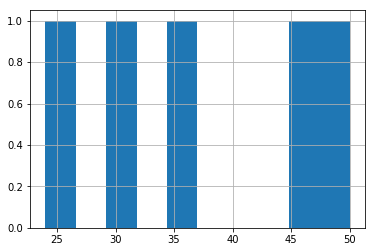

In [280]:
data.groupby("loc_id").nunique().date.hist()

In [281]:
data = data.drop_duplicates(subset=["date","loc_id"])

In [282]:
display(data.groupby("loc_id").nunique().sort_values(by="date")[-80:])

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,lon
loc_id,,,,,,,,,,,
WR0186,24,23,3,1,1,3,0,23,24,1,1
WR0024,30,23,1,1,1,1,0,30,30,1,1
WR0026,35,32,1,1,1,1,0,34,35,1,1
WR0004,45,38,3,1,1,1,0,45,45,1,1
WR0115,50,45,2,1,1,2,0,47,50,1,1


In [283]:
display(data[data.loc_id == "WR0024"].sort_values(by="date"))

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,lon
19,2015-04-21 00:00:00,dry,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Halfmile,1429574400,32.715239,-116.499008
19,2015-05-25 00:00:00,dry,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Tuna Helper,1432512000,32.715239,-116.499008
19,2017-01-26 00:00:00,good flow,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Tink & Screagle,1485388800,32.715239,-116.499008
19,2017-03-01 00:00:00,strong wide glow,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Karl,1488326400,32.715239,-116.499008
20,2017-03-16 00:00:00,flowing very well,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Anthony,1489622400,32.715239,-116.499008
20,2017-04-01 00:00:00,excellent water,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Alex & Taylor,1491004800,32.715239,-116.499008
21,2017-04-08 00:00:00,good flow,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,James,1491609600,32.715239,-116.499008
21,2017-04-28 00:00:00,good flow,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Pascal,1493337600,32.715239,-116.499008
21,2017-04-30 00:00:00,plenty of water,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Shermin,1493510400,32.715239,-116.499008
21,2017-05-13 00:00:00,plenty of water,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Jon,1494633600,32.715239,-116.499008


In [284]:
data["not_flowing"] = isNotFlowing(data["description"])
data["flowing"] = isFlowing(data["description"])

In [285]:
data.sample(100)

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,lon,not_flowing,flowing
15,2018-04-14 00:00:00,4/14/18 (silver) : flowing well.,**Tributary of N. Fork San Jacinto River [best water in this area],WR0186,B9,186.2,NaN,Silver,1523664000,33.810660,-116.697426,False,True
91,2018-05-06 00:00:00,5/6/18 (amy) : beautiful flow!! looks clean.good pools for filling up.,*Agua Caliente Creek [last crossing],WR0115,B1,115.5,NaN,Amy,1525564800,33.317172,-116.626687,False,True
98,2017-05-13 00:00:00,flowing strong,Agua Caliente Creek,WR0115,B1,114.7,NaN,Mr. Clean,1494633600,33.317172,-116.626687,False,True
20,2018-04-06 00:00:00,4/6/18 (dae-sung) : stagnant pools oils slicks on surface.,Cottonwood Creekbed,WR0026,A3,25.5,NaN,Dae-Sung,1522972800,32.729263,-116.490416,False,False
12,2017-01-25 00:00:00,strong flow,Creeklet [early spring only],WR0004,A1,4.4,NaN,Tink & Screagle,1485302400,32.608000,-116.498991,False,True
20,2015-05-31 00:00:00,large pool of water where the trail crosses the creek,Cottonwood Creekbed,WR0026,A3,25.5,NaN,Two Bar,1433030400,32.729263,-116.490416,False,False
95,2017-02-12 00:00:00,great flow,Agua Caliente Creek,WR0115,B1,114.7,NaN,Jon,1486857600,33.317172,-116.626687,False,True
87,2019-04-07 00:00:00,4/7/19 (emma) : strong flow.,Agua Caliente Creek,WR0115,B1,114.7,NaN,Emma,1554595200,33.317172,-116.626687,False,True
12,2017-03-16 00:00:00,great flow,Creeklet [early spring only],WR0004,A1,4.4,NaN,Cruise Control,1489622400,32.608000,-116.498991,False,True
11,2019-04-14 00:00:00,4/14/19 (jiffypop2019) : flowing.,Creeklet,WR0004,A1,4.4,NaN,Jiffypop2019,1555200000,32.608000,-116.498991,False,True


In [286]:
display(data.groupby("loc_id").nunique().sort_values(by="date")[-100:])

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,lon,not_flowing,flowing
loc_id,,,,,,,,,,,,,
WR0186,24,23,3,1,1,3,0,23,24,1,1,2,2
WR0024,30,23,1,1,1,1,0,30,30,1,1,2,2
WR0026,35,32,1,1,1,1,0,34,35,1,1,2,2
WR0004,45,38,3,1,1,1,0,45,45,1,1,2,2
WR0115,50,45,2,1,1,2,0,47,50,1,1,2,2


In [287]:
data["decision"] = data.flowing|data.not_flowing

In [288]:
data = data[data.decision]

In [289]:
data["status"] = data.flowing.astype(float)

In [616]:
def last_pos(row):
    last_pos_date = data[(data.loc_id == row.loc_id) & (data.status==1) & (data.date < row.date)].date.max()
    if type(last_pos_date) == float:
        return 1000
    return (row.date - last_pos_date).days
    
def last_neg(row):
    last_neg_date = data[(data.loc_id == row.loc_id) & (data.status==0) & (data.date < row.date)].date.max()    
    if type(last_neg_date) == float:
        return 1000
    return (row.date - last_neg_date).days

In [617]:
data["last_pos"] = data.apply(last_pos, axis=1)
data["last_neg"] = data.apply(last_neg, axis=1)

In [615]:
data

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,...,rain_0,rain_6,rain_7,rain_8,rain_9,rain_tot_3,rain_tot_5,rain_tot_10,last_pos,last_neg
10,2018-02-17 00:00:00,flowing pretty good.,Creeklet [early spring only]\nBeware of poison oak here.,WR0004,A1,4.4,NaN,Trixie,1518825600,32.608000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0012,0.0026,0.0026,18,999
17,2018-02-03 00:00:00,dry,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Warner Springs Monty,1517616000,32.715239,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,281,24
18,2018-02-03 00:00:00,2/3/18 (warner springs monty) : flowing. crossed on a log.,Cottonwood Creekbed,WR0026,A3,25.5,NaN,Warner Springs Monty,1517616000,32.729263,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8,500
85,2018-02-13 00:00:00,good flow,Agua Caliente Creek,WR0115,B1,114.7,NaN,Ridge Route,1518480000,33.317172,...,0.0012,0.0000,0.0000,0.0000,0.0000,0.0012,0.0012,0.0012,24,86
11,2019-05-15 00:00:00,"5/15/19 (victor) : very good flow, a bubbling brook.",Creeklet,WR0004,A1,4.4,NaN,Victor,1557878400,32.608000,...,0.0000,0.0011,0.0024,0.0058,0.0001,0.0009,0.0163,0.0264,9,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2018-03-09 00:00:00,3/9/18 (unnamed) : flowing well.,*Agua Caliente Creek [last crossing],WR0115,B1,115.5,NaN,Unnamed,1520553600,33.317172,...,0.0000,0.0000,0.0000,0.0004,0.0085,0.0000,0.0012,0.0172,24,110
14,2018-04-13 00:00:00,4/13/18 (campfinder) : flowing at 2 liters per minute.,"Deer Springs, N Fork San Jacinto River",WR0186,B9,185.6,NaN,Campfinder,1523577600,33.810660,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5,105
15,2018-04-14 00:00:00,4/14/18 (silver) : flowing well.,**Tributary of N. Fork San Jacinto River [best water in this area],WR0186,B9,186.2,NaN,Silver,1523664000,33.810660,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1,106
15,2018-05-12 00:00:00,5/12/18 (walnut & pecan) : flowing nicely.,**Tributary of N. Fork San Jacinto River [best water in this area],WR0186,B9,186.2,NaN,Walnut & Pecan,1526083200,33.810660,...,0.0000,0.0000,0.0000,0.0000,0.0042,0.0000,0.0000,0.0042,14,17


[Text(0,0,''),
 Text(0,0,'dry'),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'flowing')]

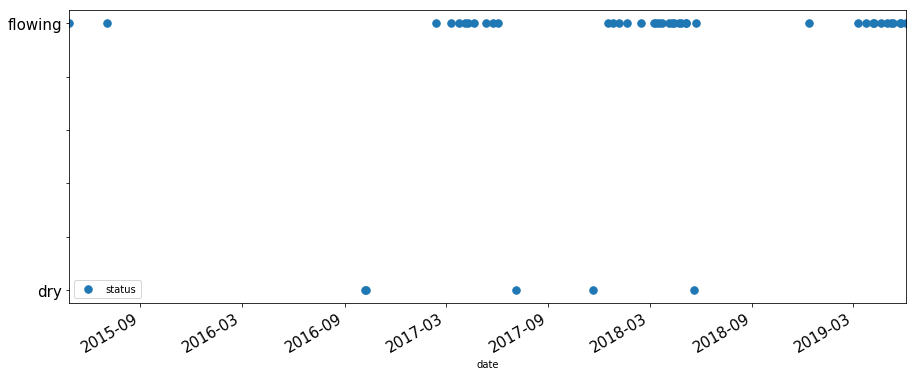

In [434]:
ax = data[data.loc_id ==  focus_loc_ids[1]].plot(x="date",y="status",style=".",figsize=(15,6),fontsize=15, ms=15)
ax.set_yticklabels(["","dry","","","","","flowing"])

In [291]:
data.nunique()

date           130
description    123
loc            10 
loc_id         5  
map            4  
mile           8  
mile_2         0  
user           103
unixtime       130
lat            5  
lon            5  
not_flowing    2  
flowing        2  
decision       1  
status         2  
dtype: int64

In [299]:
data.shape

(158, 15)

In [437]:
rain = {(row.loc_id, row.date):getRainfall(row.lat, row.lon, row.unixtime) for i,row in data.iterrows()}
for i,row in data.iterrows()

In [438]:
rain

{('WR0004', datetime.datetime(2015, 4, 22, 0, 0)): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ('WR0004', datetime.datetime(2015, 5, 25, 0, 0)): [0,
  0.0007,
  0.0015,
  0,
  0,
  0,
  0,
  0,
  0,
  0.0261],
 ('WR0004', datetime.datetime(2017, 1, 25, 0, 0)): [0.0074,
  0.0412,
  0.0303,
  0.0047,
  0.0731,
  0.032,
  0.0007,
  0,
  0,
  0],
 ('WR0004', datetime.datetime(2017, 2, 20, 0, 0)): [0.0061,
  0.0147,
  0.0229,
  0,
  0,
  0,
  0,
  0,
  0.0014,
  0],
 ('WR0004', datetime.datetime(2017, 3, 16, 0, 0)): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ('WR0004', datetime.datetime(2017, 3, 21, 0, 0)): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ('WR0004', datetime.datetime(2017, 3, 31, 0, 0)): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0.002,
  0.0043,
  0],
 ('WR0004', datetime.datetime(2017, 4, 13, 0, 0)): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ('WR0004', datetime.datetime(2017, 4, 19, 0, 0)): [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 ('WR0004', d

In [833]:
f = open('rain.pkl', 'wb')   # Pickle file is newly created where foo1.py is
pickle.dump(rain, f)
f.close() 

In [440]:
f = open('rain.pkl', 'rb')   # Pickle file is newly created where foo1.py is
print(pickle.load(f))
f.close() 

{('WR0004', datetime.datetime(2018, 2, 17, 0, 0)): [0, 0, 0.0012, 0, 0.0014, 0, 0, 0, 0, 0], ('WR0024', datetime.datetime(2018, 2, 3, 0, 0)): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ('WR0026', datetime.datetime(2018, 2, 3, 0, 0)): [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], ('WR0115', datetime.datetime(2018, 2, 13, 0, 0)): [0.0012, 0, 0, 0, 0, 0, 0, 0, 0, 0], ('WR0004', datetime.datetime(2019, 5, 15, 0, 0)): [0, 0, 0.0009, 0.0141, 0.0013, 0.0007, 0.0011, 0.0024, 0.0058, 0.0001], ('WR0024', datetime.datetime(2019, 5, 19, 0, 0)): [0, 0.0004, 0.0094, 0, 0, 0, 0.002, 0.0169, 0.0014, 0.0006], ('WR0026', datetime.datetime(2019, 5, 19, 0, 0)): [0, 0.0004, 0.0096, 0, 0, 0, 0.002, 0.0171, 0.0012, 0.0005], ('WR0115', datetime.datetime(2019, 6, 3, 0, 0)): [0.0001, 0, 0, 0, 0.0001, 0.0005, 0.0054, 0.0034, 0.0001, 0], ('WR0004', datetime.datetime(2018, 5, 16, 0, 0)): [0, 0, 0, 0.0001, 0, 0, 0, 0, 0, 0], ('WR0024', datetime.datetime(2018, 5, 17, 0, 0)): [0, 0, 0, 0, 0.0002, 0, 0, 0, 0, 0], ('WR0115', datetime.datetime(

In [124]:
sample["rain"] = sample.apply(lambda row: getRainfall(row.lat, row.lon, row.unixtime ), axis=1)

In [435]:
n_days = 10
def getRainfall(lat, lon, time):
    rainfalls = []
    for days in range(n_days):
        r = requests.get(f"https://api.darksky.net/forecast/840fdc3fb61acc3d4e904978b5ba8dc5/{lat},{lon},{time-(days*24*60*60)}")
        rainfalls.append(r.json()["daily"]["data"][0]["precipIntensity"])
    return rainfalls

In [655]:
for i in range(n_days):
    data[f"rain_{i}"] = 1000 * data.apply(lambda row: rain[(row.loc_id, row.date)][i], axis=1)

In [656]:
data["rain_tot_3"] = data[["rain_0","rain_1", "rain_2"]].sum(axis=1)
data["rain_tot_5"] = data[["rain_0","rain_1", "rain_2", "rain_3", "rain_4"]].sum(axis=1)
data["rain_tot_10"] = data[["rain_0","rain_1", "rain_2", "rain_3", "rain_4","rain_5", "rain_6", "rain_7", "rain_8", "rain_9"]].sum(axis=1)

In [657]:
data

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,...,rain_0,rain_6,rain_7,rain_8,rain_9,rain_tot_3,rain_tot_5,rain_tot_10,last_pos,last_neg
10,2018-02-17 00:00:00,flowing pretty good.,Creeklet [early spring only]\nBeware of poison oak here.,WR0004,A1,4.4,NaN,Trixie,1518825600,32.608000,...,0.0,0.0,0.0,0.0,0.0,1.2,2.6,2.6,18,999
17,2018-02-03 00:00:00,dry,Cottonwood Creek Bridge,WR0024,A3,24.1,NaN,Warner Springs Monty,1517616000,32.715239,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281,24
18,2018-02-03 00:00:00,2/3/18 (warner springs monty) : flowing. crossed on a log.,Cottonwood Creekbed,WR0026,A3,25.5,NaN,Warner Springs Monty,1517616000,32.729263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,500
85,2018-02-13 00:00:00,good flow,Agua Caliente Creek,WR0115,B1,114.7,NaN,Ridge Route,1518480000,33.317172,...,1.2,0.0,0.0,0.0,0.0,1.2,1.2,1.2,24,86
11,2019-05-15 00:00:00,"5/15/19 (victor) : very good flow, a bubbling brook.",Creeklet,WR0004,A1,4.4,NaN,Victor,1557878400,32.608000,...,0.0,1.1,2.4,5.8,0.1,0.9,16.3,26.4,9,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2018-03-09 00:00:00,3/9/18 (unnamed) : flowing well.,*Agua Caliente Creek [last crossing],WR0115,B1,115.5,NaN,Unnamed,1520553600,33.317172,...,0.0,0.0,0.0,0.4,8.5,0.0,1.2,17.2,24,110
14,2018-04-13 00:00:00,4/13/18 (campfinder) : flowing at 2 liters per minute.,"Deer Springs, N Fork San Jacinto River",WR0186,B9,185.6,NaN,Campfinder,1523577600,33.810660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,105
15,2018-04-14 00:00:00,4/14/18 (silver) : flowing well.,**Tributary of N. Fork San Jacinto River [best water in this area],WR0186,B9,186.2,NaN,Silver,1523664000,33.810660,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,106
15,2018-05-12 00:00:00,5/12/18 (walnut & pecan) : flowing nicely.,**Tributary of N. Fork San Jacinto River [best water in this area],WR0186,B9,186.2,NaN,Walnut & Pecan,1526083200,33.810660,...,0.0,0.0,0.0,0.0,4.2,0.0,0.0,4.2,14,17


In [681]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, BayesianRidge
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split


In [785]:
data.corr()["status"]

unixtime       0.226333
lat            0.049036
lon           -0.066779
not_flowing   -0.883577
flowing        1.000000
decision      NaN      
status         1.000000
rain_1         0.033409
rain_2         0.089362
rain_3         0.108414
rain_4         0.082266
rain_5         0.066061
rain_0        -0.112278
rain_6         0.108899
rain_7        -0.045446
rain_8         0.067017
rain_9        -0.112723
rain_tot_3    -0.045002
rain_tot_5     0.024270
rain_tot_10    0.054997
last_pos      -0.447660
last_neg       0.018385
Name: status, dtype: float64

In [818]:
inputs = data[data.loc_id == focus_loc_ids[0]][["rain_tot_5","last_pos","last_neg"]]
labels = data[data.loc_id == focus_loc_ids[0]]['status']
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, random_state=0)

lr = LogisticRegression(C=100, penalty="l1", class_weight="balanced").fit(X_train, y_train)
svc = SVC(probability=True).fit(X_train, y_train)
br = BayesianRidge().fit(X_train, y_train)
lrcv = LogisticRegressionCV().fit(inputs, labels)
rf = RandomForestClassifier().fit(inputs, labels)

dummy = DummyClassifier().fit(X_train, y_train)
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [819]:
for (name, b) in zip(X_train.columns,lr.coef_[0]):
    print(f'{b:.3f} {name}')
    print()
print(f'{np.exp(lr.intercept_[0]):.5f} intercept')

5.908 rain_tot_5

-0.021 last_pos

0.003 last_neg

0.59442 intercept


In [820]:
print(f'Training score {lr.score(X_train, y_train)}')
print(f'Training score {svc.score(X_train, y_train)}')
print(f'Training score {lrcv.score(X_train, y_train)}')
print(f'Training score {rf.score(X_train, y_train)}')


print()
print(f'Test score {lr.score(X_test, y_test)}')
print(f'Test score {svc.score(X_test, y_test)}')
print(f'Test score {lrcv.score(X_test, y_test)}')
print(f'Test score {rf.score(X_test, y_test)}')
print(f'Dummy score {dummy.score(X_test, y_test)}')
print(f'Most Frequent score {dummy_majority.score(X_test, y_test)}')

Training score 0.5882352941176471
Training score 1.0
Training score 0.8235294117647058
Training score 1.0

Test score 0.3333333333333333
Test score 0.8333333333333334
Test score 1.0
Test score 1.0
Dummy score 0.6666666666666666
Most Frequent score 0.8333333333333334


In [821]:
from sklearn.metrics import f1_score

print(f'Logistic Regression f1 score {f1_score(y_test, rf.predict(X_test))}')
print(f'Dummy f1 score {f1_score(y_test, dummy.predict(X_test))}')

Logistic Regression f1 score 1.0
Dummy f1 score 0.888888888888889


In [822]:
display(list(zip(y_test,rf.predict_proba(X_test))))


[(0.0, array([ 0.8,  0.2])),
 (1.0, array([ 0.,  1.])),
 (1.0, array([ 0.,  1.])),
 (1.0, array([ 0.2,  0.8])),
 (1.0, array([ 0.1,  0.9])),
 (1.0, array([ 0.,  1.]))]

In [823]:
display(list(zip(y_test,rf.decision_path(X_test))))


[(0.0, <6x106 sparse matrix of type '<class 'numpy.int64'>'
  	with 220 stored elements in Compressed Sparse Row format>),
 (1.0, array([  0,  13,  26,  37,  52,  57,  68,  81,  86,  97, 106]))]

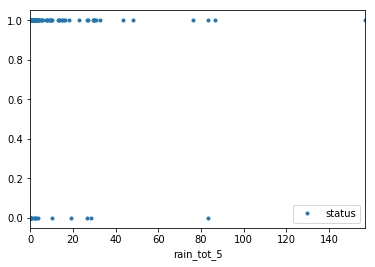

In [840]:
data.plot(x="rain_tot_5",y="status",style=".")

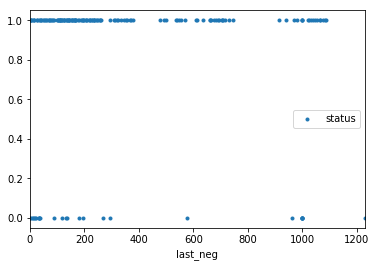

In [841]:
data.plot(x="last_neg",y="status",style=".")

In [825]:
data[data.status == 1].rain_tot_3.mean()

4.7137404580152671

In [826]:
data[data.status == 0].rain_tot_3.mean()

6.4259259259259274

In [827]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

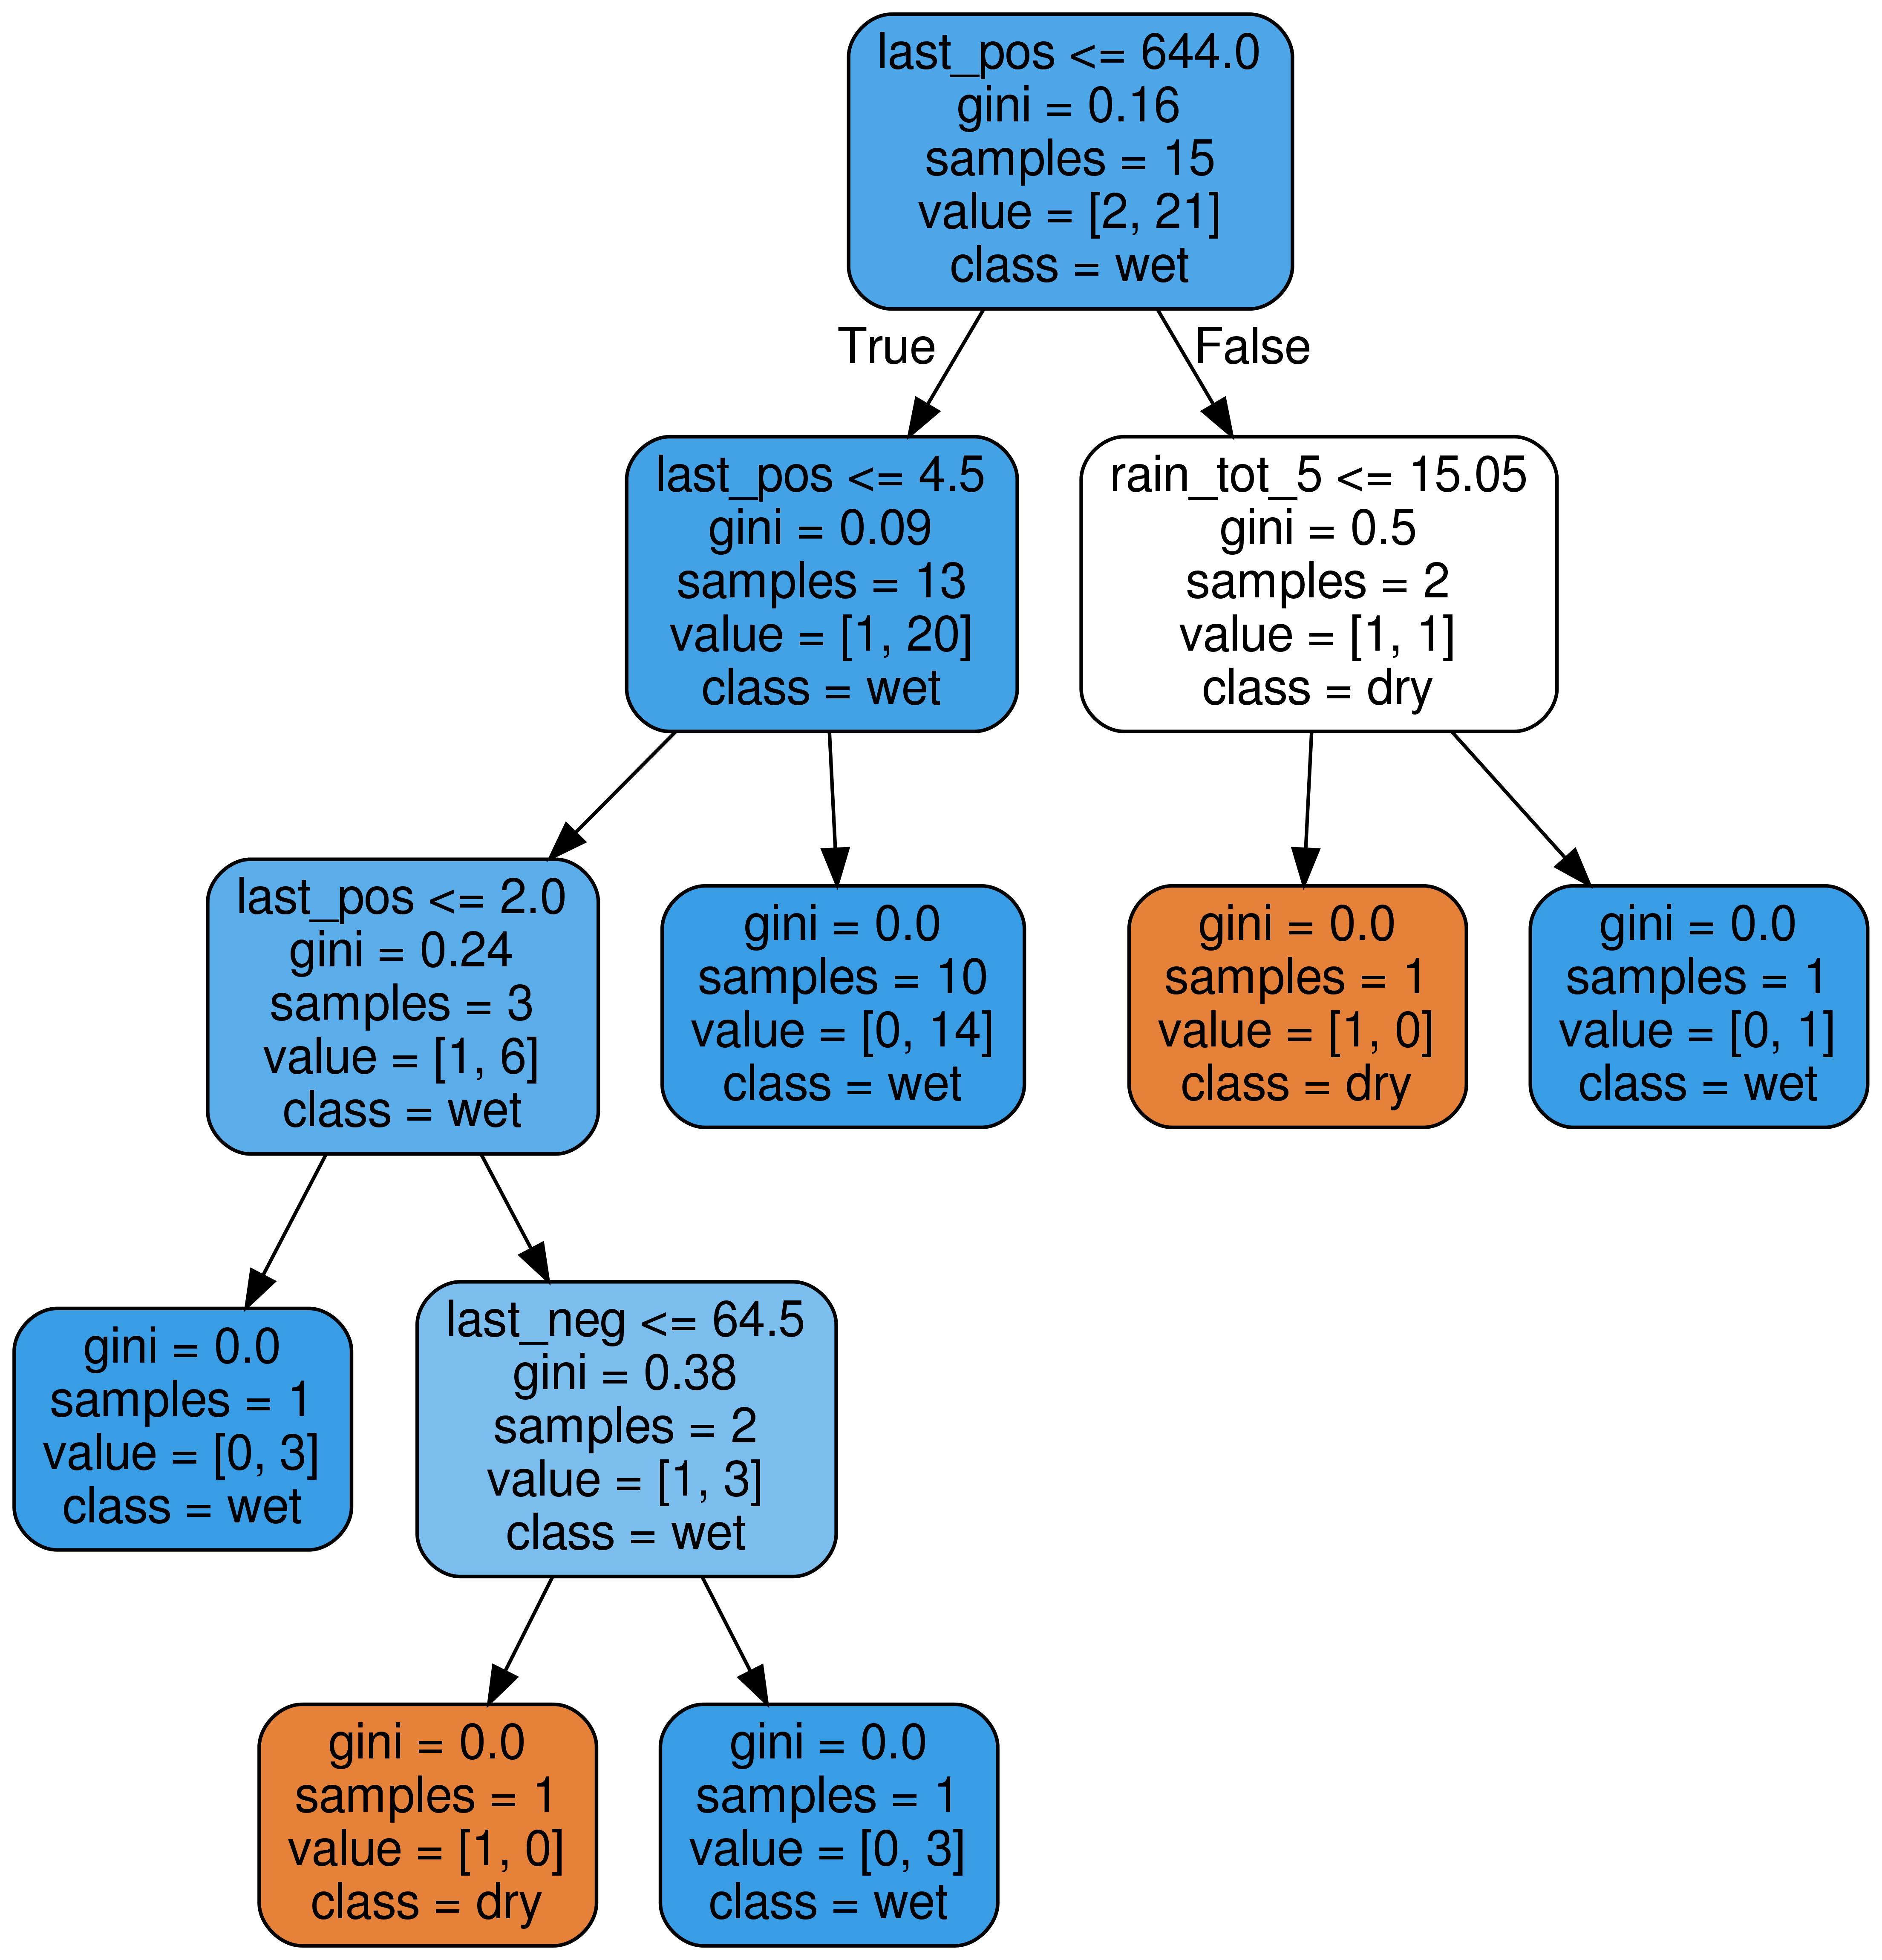

In [842]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(rf.estimators_[5], out_file='tree.dot', 
                feature_names = X_test.columns,
                class_names = ["dry","wet"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [831]:
out = [{'lat': lat[loc_id], 'lon':lon[loc_id], 'name': name[loc_id]} for loc_id in focus_loc_ids]

In [832]:
f = open('out.pkl', 'wb')   # Pickle file is newly created where foo1.py is
pickle.dump(out, f)
f.close() 